# Define the Problem: About The Dataset
#### ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. You're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

#### Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer.
* A medical insurance cost prediction project typically involves using machine learning techniques to predict the cost of medical insurance for individuals based on various factors such as age, gender, BMI (Body Mass Index), smoking status, region, and other relevant features. Here's an overview of the key steps involved in such a project:

* Data Collection:
  
Gather a dataset containing information about individuals' medical insurance costs along with relevant features such as age, gender, BMI, smoking status, region, etc. This dataset may be obtained from public sources, healthcare providers, or insurance companies.

* Data Preprocessing:

Clean the dataset by handling missing values, outliers, and inconsistencies.
Convert categorical variables into numerical representations using techniques such as one-hot encoding or label encoding.
Normalize or scale numerical features to ensure they are on a similar scale, which can improve the performance of certain machine learning algorithms.

* Exploratory Data Analysis (EDA):

Explore the dataset to gain insights into the distribution of features, relationships between variables, and any patterns or trends.
Visualize the data using plots such as histograms, scatter plots, and correlation matrices to understand the underlying structure of the data.

* Feature Engineering:

Create new features or transform existing ones that may improve the predictive performance of the model.
For example, derive features such as BMI from height and weight, or create interaction terms between certain features.

* Model Selection and Training:

Choose appropriate machine learning algorithms for regression tasks, such as linear regression, decision trees, random forests, gradient boosting methods (e.g., AdaBoost, XGBoost), or neural networks.
Split the dataset into training and testing sets using techniques like train-test split or cross-validation.
Train the chosen models on the training data and tune hyperparameters using techniques like grid search or randomized search.

* Model Evaluation:

Evaluate the performance of the trained models using appropriate metrics such as R-squared (R^2) score, mean squared error (MSE), mean absolute error (MAE), or root mean squared error (RMSE).
Compare the performance of different models to select the best-performing one for deployment.

* Deployment :

Deploy the trained model into production, where it can be used to make predictions on new data.
Monitor the performance of the deployed model over time and update it as needed to maintain accuracy and reliability.










# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector



* import pandas as pd: This imports the pandas library and assigns it the alias pd. Pandas is a powerful library for data manipulation and analysis, particularly for working with structured data in tabular form using DataFrame objects.

* import numpy as np: This imports the NumPy library and assigns it the alias np. NumPy is a fundamental library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

* import matplotlib.pyplot as plt: This imports the pyplot module from the Matplotlib library and assigns it the alias plt. Matplotlib is a widely used plotting library in Python, and pyplot provides a MATLAB-like interface for creating various types of plots and visualizations.

* import seaborn as sns: This imports the seaborn library, which is built on top of Matplotlib and provides a higher-level interface for creating attractive and informative statistical graphics and visualizations.

* from sklearn.preprocessing import StandardScaler: This imports the StandardScaler class from the preprocessing module of scikit-learn. StandardScaler is used for standardizing features by removing the mean and scaling to unit variance, which can be important for certain machine learning algorithms.

* from sklearn.model_selection import train_test_split: This imports the train_test_split function from the model_selection module of scikit-learn. train_test_split is commonly used to split data into training and testing sets for machine learning model evaluation.

* from sklearn.linear_model import LinearRegression: This imports the LinearRegression class from the linear_model module of scikit-learn. Linear regression is a simple linear model used for modeling the relationship between a dependent variable and one or more independent variables.

* from sklearn.tree import DecisionTreeRegressor: This imports the DecisionTreeRegressor class from the tree module of scikit-learn. Decision trees are non-parametric supervised learning models used for regression tasks.

* from sklearn.ensemble import AdaBoostRegressor: This imports the AdaBoostRegressor class from the ensemble module of scikit-learn. AdaBoost (Adaptive Boosting) is an ensemble learning method that combines multiple weak learners to build a strong learner.

* from sklearn.ensemble import RandomForestRegressor: This imports the RandomForestRegressor class from the ensemble module of scikit-learn. Random forests are ensemble learning methods that build multiple decision trees and combine their predictions to improve accuracy and robustness.

* from sklearn.metrics import r2_score, mean_squared_error: This imports the r2_score function and mean_squared_error function from the metrics module of scikit-learn. These functions are commonly used to evaluate the performance of regression models.

* from sklearn.feature_selection import SequentialFeatureSelector: This imports the SequentialFeatureSelector class from the feature_selection module of scikit-learn. Sequential feature selection is a technique used to select the most relevant features from a dataset for improving model performance.

In [2]:
import warnings
warnings.filterwarnings("ignore")

* import warnings: This imports the warnings module, which provides functions for issuing warnings to the user. Warnings are typically issued by Python or by third-party libraries to alert the user about potential issues, inconsistencies, or deprecated features.

* warnings.filterwarnings("ignore"): This line sets up a filter to ignore all warnings. When this line is executed, Python will suppress any warnings that would have been issued during the execution of the code.
* It's important to use caution when suppressing warnings, as it can potentially hide important information about problems in your code or unexpected behavior in the execution environment.
* It's recommended to only suppress warnings when you are confident that doing so will not lead to unintended consequences or hide genuine issues that need to be addressed.

# Loading Data
## Data Collection

In [3]:
data = pd.read_csv("medical_insurance.csv")

In [4]:
df = data.copy()

* copying the DataFrame data into df marks the beginning of the data preparation phase in a machine learning project. 
* It enables you to manipulate and transform the data to create meaningful features for training machine learning models while preserving the integrity of the original dataset.

In [5]:
df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* Now, we can observe the data and its shape(rows x columns)

* This dataset contains 1338 data points with 6 independent features and 1 target feature(charges).

* BMI is less than 18.5, it falls within the underweight range. 
* If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range. 
* If your BMI is 25.0 to 29.9, it falls within the overweight range.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


* From the above, we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.

In [185]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010



* We can look at the descriptive statistical measures of the continuous data available in the dataset.

# Data Preprocessing:


In [186]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* Here, we observe there is no missing values in our data and there are 7 columns and 1338 rows.

* Here our target column is charges. we need to predict the charges based on other features.

In [7]:
df.duplicated().sum()

1435

* Understanding and identifying duplicate rows in a DataFrame is important for data cleaning and preprocessing tasks in data analysis and machine learning projects.
* Removing duplicates can help improve the accuracy and reliability of analyses and models by ensuring that each observation in the dataset is unique and representative.

In [8]:
df.drop_duplicates(inplace = True)

* This operation is useful for data cleaning and preprocessing tasks in data.
* It helps ensure that the dataset contains only unique observations, which can improve the quality and reliability of analyses and models.

# Categorical Variable Analysis: 

<Axes: xlabel='sex', ylabel='count'>

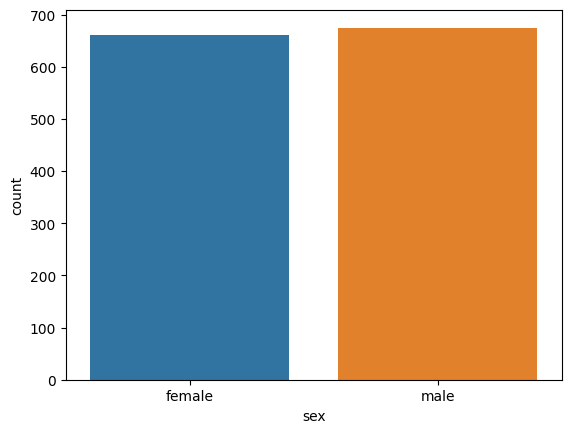

In [198]:
sns.countplot(x = "sex", data = df, hue = "sex")

* This type of visualization is useful for understanding the distribution of categorical variables in the dataset and how they relate to each other.
* In this case, the countplot will provide insight into the distribution of smokers and non-smokers across different genders.

In [195]:
categorical_data = df.select_dtypes(exclude=np.number)

for col in categorical_data.columns:
    print(f'{col.upper()}:')
    print(df[col].value_counts())
    print('---' * 9)

SEX:
sex
male      675
female    662
Name: count, dtype: int64
---------------------------
SMOKER:
smoker
no     1063
yes     274
Name: count, dtype: int64
---------------------------
REGION:
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
---------------------------


* The purpose of this code is to provide insights into the distribution of categorical variables in the DataFrame df.
*  By displaying the counts of unique values for each categorical column, you can observe the frequency of different categories and understand their distribution in the dataset.
*  This information can be useful for data exploration, identifying potential data quality issues, and informing feature engineering decisions in machine learning tasks.

<Axes: xlabel='region', ylabel='count'>

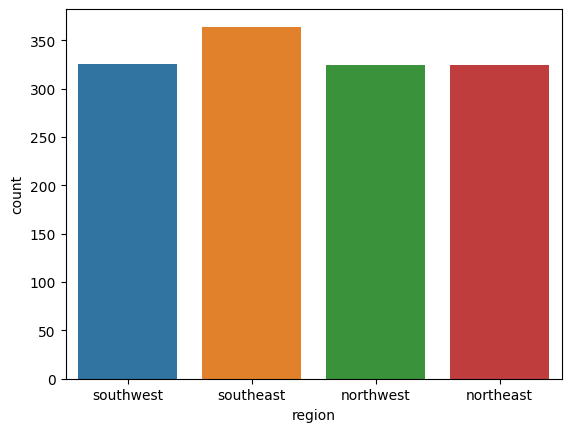

In [197]:
sns.countplot(x='region', data=df, hue="region")

* The purpose of creating a count plot like this is to visually represent the distribution of observations across different categories (regions in this case).
*  Each bar in the plot represents the count of observations for a specific region.

<Axes: xlabel='smoker', ylabel='count'>

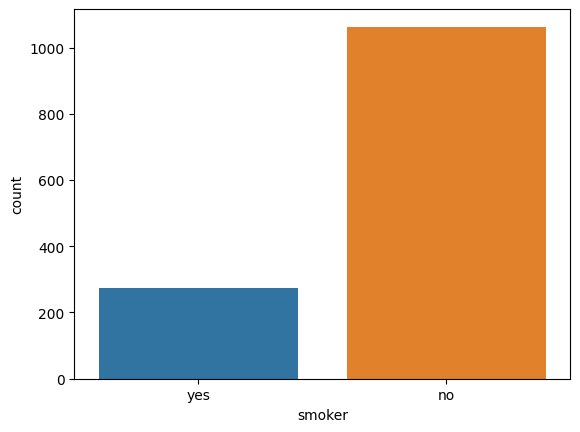

In [199]:
sns.countplot(x='smoker', data=df, hue="smoker")

* This visualization helps to understand the distribution of smoking status within the dataset and allows for easy comparison of the counts of smokers and non-smokers.


 ### Checking Outliers

<Axes: >

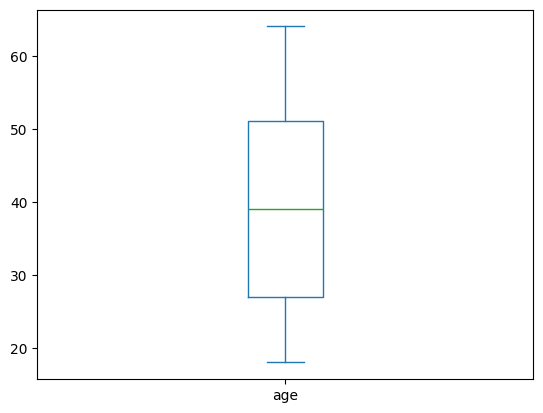

In [9]:
df["age"].plot.box()

* Interpreting the box plot allows us to understand the central tendency, spread, and presence of outliers in the distribution of the "age" variable. 

# Exploratory Data Analysis (EDA):
 
* EDA is an approach to analyzing the data using visual techniques.
* It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.
* While performing the EDA of this dataset we will try to look at what is the relation between the independent features that is how one affects the other.

In [148]:
df[["age", "charges"]].corr(method = "pearson")

,age,charges
age,1.000000,0.298308
charges,0.298308,1.000000


* A value of 1 indicates a perfect positive linear correlation (as one variable increases, the other variable also increases proportionally).

* A value of -1 indicates a perfect negative linear correlation (as one variable increases, the other variable decreases proportionally).

* A value close to 0 indicates little to no linear correlation between the variables.
* The resulting correlation matrix will have the Pearson correlation coefficient between "age" and "charges" as its single entry. This coefficient quantifies the strength and direction of the linear relationship between the two variables.
* Interpreting the correlation coefficient helps in understanding the association between the variables and can guide further analysis or modeling decisions.

In [187]:
df["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

* It means that there are 662 occurrences of the value "female" and 675 occurrences of the value "male" in the "sex" column of the DataFrame df.

In [188]:
df.groupby("sex")["charges"].mean()

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

* The resulting output is a Series where the index represents the unique values in the "sex" column ("male" and "female"), and the values represent the mean charges for each group.
* It means that the average medical charges for females (grouped by sex) is approximately  $12,569.58, and for males, it's  approximately $13,974.99.

In [189]:
male = df[df["sex"]=="male"].index
female = df[df["sex"] == "female"].index

* After executing these lines of code, male and female will contain the index labels of rows in the DataFrame df that correspond to males and females, respectively.
* These variables can be further used for various purposes, such as indexing, filtering, or analysis based on gender categories.

In [190]:
female_sample = np.random.choice(female, 150)
male_sample = np.random.choice(male, 150)

* After executing these lines of code, female_sample and male_sample will contain randomly selected index labels of 150 females and 150 males, respectively, from the DataFrame df.
  
* These samples can be further used for various purposes, such as conducting statistical analyses, building models, or performing hypothesis testing on subsets of the data.

In [191]:
female_sample = df.iloc[female_sample]["charges"]
male_sample = df.iloc[male_sample]["charges"]

* After executing these lines of code, female_sample and male_sample will contain samples of medical charges for 150 randomly selected females and 150 randomly selected males, respectively, from the DataFrame df. 
* These samples can be further analyzed or compared to understand any differences or similarities in medical charges between genders.

f_mean = female_sample.mean()
f_std = female_sample.std()
m_mean = male_sample.mean()
m_std = male_sample.std()
f_mean, f_std , m_mean, m_std

* After executing these lines of code, f_mean will contain the mean medical charges for the female sample,
* f_std will contain the standard deviation of medical charges for the female sample,
* m_mean will contain the mean medical charges for the male sample,
* and m_std will contain the standard deviation of medical charges for the male sample.
* These statistical measures provide insights into the central tendency and variability of medical charges within each gender category.

In [192]:
n = 150

* In summary, n = 150 specifies the sample size for the random samples of medical charges, indicating that each sample contains 150 observations.
* This sample size was chosen based on considerations relevant to the specific analysis or investigation being conducted.

## z- test for p samples

In [193]:
p_val = (f_mean-m_mean)/ np.sqrt((f_std**2/n)+(m_std**2/n))

* p_val = (f_mean - m_mean) / np.sqrt((f_std**2/n) + (m_std**2/n)): This expression calculates the test statistic, which is the difference in means divided by the standard error of the difference.
* This test statistic is typically used in hypothesis testing to determine the significance of the observed difference between groups.
* The resulting p_val represents the test statistic, which is commonly used in hypothesis testing, particularly in the context of comparing means between two groups.
*  It quantifies the strength of evidence against the null hypothesis that there is no difference in means between the two groups.
*  A smaller p-value indicates stronger evidence against the null hypothesis, suggesting that the observed difference is unlikely to have occurred by random chance alone.

In [194]:
p_val

0.1293595033388648

* After obtaining the p-value, it can be compared to a pre-defined significance level (e.g., 0.05) to make a decision about whether to reject or fail to reject the null hypothesis.
*  If the p-value is less than the significance level, the null hypothesis is typically rejected, indicating that there is evidence to support the alternative hypothesis that there is a difference in means between the groups.
*   If the p-value is greater than or equal to the significance level, the null hypothesis is not rejected, suggesting that there is insufficient evidence to conclude that there is a difference in means between the groups.

1.55 is less than alpha (1.65) so this mean difference is significant.

<Axes: >

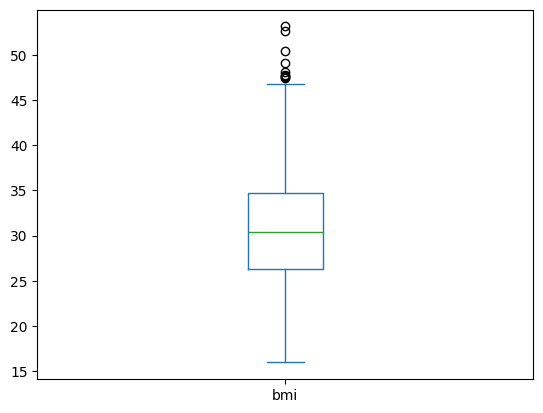

In [94]:
df["bmi"].plot.box()

* Interpreting the box plot allows you to understand the central tendency, spread, and presence of outliers in the distribution of the "bmi" variable.
* It is a valuable visualization tool for exploratory data analysis and identifying any unusual or unexpected patterns in the data related to Body Mass Index.

In [95]:
df[["bmi", "charges"]].corr(method = "pearson")

,bmi,charges
bmi,1.000000,0.198401
charges,0.198401,1.000000


* The resulting correlation matrix will have the Pearson correlation coefficient between "bmi" and "charges" as its single entry.
* This coefficient quantifies the strength and direction of the linear relationship between the two variables.
* If the correlation coefficient is positive and close to 1, it indicates that as BMI increases, charges tend to increase as well.
*  If the correlation coefficient is negative and close to -1, it suggests that as BMI increases, charges tend to decrease.
* If the correlation coefficient is close to 0, it indicates little to no linear relationship between BMI and charges.
* Interpreting the correlation coefficient helps in understanding the association between the two variables and can guide further analysis or modeling decisions.

In [96]:
df["children"].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

* The resulting output provides the count of occurrences for each unique value in the "children" column.
* It means that there are 573 individuals with 0 children, 324 individuals with 1 child, 240 individuals with 2 children, and so on.
* This type of analysis is useful for understanding the distribution of categorical variables in the dataset, which can help in data exploration and decision-making processes.
* It provides insights into the composition of the dataset and the relative frequencies of different categories within a particular variable.

In [97]:
df[["children", "charges"]].corr(method = "pearson")

,children,charges
children,1.000000,0.067389
charges,0.067389,1.000000


* The resulting correlation matrix will have the Pearson correlation coefficient between "children" and "charges" as its single entry.
* This coefficient quantifies the strength and direction of the linear relationship between the two variables.
* If the correlation coefficient is positive and close to 1, it indicates that as the number of children increases, charges tend to increase as well.
*  If the correlation coefficient is negative and close to -1, it suggests that as the number of children increases, charges tend to decrease.
*  If the correlation coefficient is close to 0, it indicates little to no linear relationship between the number of children and charges.

Interpreting the correlation coefficient helps in understanding the association between the two variables and can guide further analysis or modeling decision

In [98]:
df["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

* The resulting output provides the count of occurrences for each unique value in the "smoker" column.
* It means that there are 1063 individuals classified as non-smokers and 274 individuals classified as smokers in the dataset.
* This type of analysis is useful for understanding the distribution of categorical variables in the dataset, which can help in data exploration and decision-making processes.
*  It provides insights into the composition of the dataset and the relative frequencies of different categories within a particular variable, in this case, the smoking status of individuals.

In [99]:
df.groupby("smoker")["charges"].mean()

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

* The resulting output is a Series where the index represents the unique values in the "smoker" column ("yes" and "no"), and the values represent the mean charges for each group.
* It means that the average medical charges for non-smokers (grouped by smoking status) is $8440.660307, and for smokers, it's $32050.231832.
* This type of analysis helps in understanding the relationship between categorical variables (in this case, "smoker") and numerical variables (in this case, "charges").
*  It provides insights into how the mean value of a numerical variable varies across different categories of a categorical variable, allowing for comparisons and further exploration of the data.
*  Specifically, in this example, it provides insight into the difference in medical charges between smokers and non-smokers.

In [100]:
df.groupby("region")["charges"].mean()

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

* The resulting output is a Series where the index represents the unique values in the "region" column (e.g., "northeast", "northwest", "southeast", "southwest"), and the values represent the mean charges for each group.
* It means that the average medical charges for individuals in the northeast region is $13406.384516, in the northwest region is $12450.840844, in the southeast region is $14735.411, and in the southwest region is $1246.9377.
* This type of analysis helps in understanding the relationship between categorical variables (in this case, "region") and numerical variables (in this case, "charges").
*  It provides insights into how the mean value of a numerical variable varies across different categories of a categorical variable, allowing for comparisons and further exploration of the data based on geographical regions.








In [101]:
new_df = df[["age", "bmi", "children"]]

* After executing this line of code, new_df will contain a subset of the original DataFrame df with only the columns "age", "bmi", and "children".
* This operation is useful for creating a smaller DataFrame focused on specific features of interest, which can be used for further analysis or modeling tasks.

In [102]:
scaler = StandardScaler()

* scaler = StandardScaler(): This line initializes a StandardScaler object named scaler.
* This object will be used to scale the numerical features in the dataset.
* After this line of code is executed, the scaler object is ready to transform the data by applying standardization.
* The StandardScaler object contains methods like fit() and transform() to perform the scaling process.
* This code would fit the scaler to the data (calculating mean and standard deviation) and then transform the data, applying the standardization process. The resulting scaled_data would be a numpy array with the scaled features.

* Standardizing features is important in many machine learning algorithms, particularly those that are distance-based (e.g., k-nearest neighbors, support vector machines) or gradient-based (e.g., logistic regression, neural networks).
* It ensures that features with larger scales do not dominate the learning process and helps algorithms converge faster.

In [103]:
Scaled_data = scaler.fit_transform(new_df)

* After executing this line of code, Scaled_data will contain the standardized version of the features in new_df.
* The standardized data will have a mean of approximately 0 and a standard deviation of 1 for each feature, ensuring that all features are on a similar scale.
*  This standardized data is often used as input for machine learning algorithms, particularly those that are sensitive to feature scaling, such as support vector machines, k-nearest neighbors, and neural networks.

In [104]:
Scaled_data

array([[-1.44041773, -0.45315959, -0.90923416],
       [-1.51164747,  0.50942165, -0.07944162],
       [-0.79935006,  0.3831546 ,  1.58014347],
       ...,
       [-1.51164747,  1.01448983, -0.90923416],
       [-1.29795825, -0.79752426, -0.90923416],
       [ 1.55123139, -0.26129928, -0.90923416]])

* Scaled_data contains the standardized version of the features in new_df, and it is often used as input for machine learning models to improve their performance and stability.

In [105]:
dummies = pd.get_dummies(df[["sex", "region", "smoker"]],drop_first=True, dtype=float)

* After executing this line of code, the DataFrame dummies will contain dummy variables for the categorical features "sex", "region", and "smoker", with the first category dropped for each feature.
*  These dummy variables are binary indicators representing the presence or absence of each category for each observation in the original dataset.
*  These dummy variables are often used in machine learning models that require numerical input, allowing us to include categorical features in the analysis.
*   They are particularly useful in scenarios where categorical variables do not have a natural ordering, such as "sex" and "smoker" in this case.








In [106]:
dummies

,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
1333,1.0,1.0,0.0,0.0,0.0
1334,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0,0.0
1336,0.0,0.0,0.0,1.0,0.0


In [107]:
Scaled_df = pd.DataFrame(Scaled_data, columns=["age", "bmi", "children"])
Scaled_df

,age,bmi,children
0,-1.440418,-0.453160,-0.909234
1,-1.511647,0.509422,-0.079442
2,-0.799350,0.383155,1.580143
3,-0.443201,-1.305052,-0.909234
4,-0.514431,-0.292456,-0.909234
...,...,...,...
1332,0.767704,0.050269,1.580143
1333,-1.511647,0.206053,-0.909234
1334,-1.511647,1.014490,-0.909234
1335,-1.297958,-0.797524,-0.909234


* After executing this line of code, Scaled_df will be a DataFrame containing the standardized features "age", "bmi", and "children", with the specified column names.
* Each column will contain the standardized values of the corresponding feature, ensuring that all features are on a similar scale with a mean of approximately 0 and a standard deviation of 1.

* This standardized DataFrame can be used as input for machine learning models or further analysis, particularly those that perform better when features are on similar scales.
*  Standardization helps to avoid issues where certain features dominate the learning process due to differences in their scales.








# Split Data into Training and Testing Sets:

In [108]:
x = pd.concat([dummies,Scaled_df], axis = 1).dropna().reset_index(drop = True)

In [109]:
x

,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,age,bmi,children
0,0.0,0.0,0.0,1.0,1.0,-1.440418,-0.453160,-0.909234
1,1.0,0.0,1.0,0.0,0.0,-1.511647,0.509422,-0.079442
2,1.0,0.0,1.0,0.0,0.0,-0.799350,0.383155,1.580143
3,1.0,1.0,0.0,0.0,0.0,-0.443201,-1.305052,-0.909234
4,1.0,1.0,0.0,0.0,0.0,-0.514431,-0.292456,-0.909234
...,...,...,...,...,...,...,...,...
1331,0.0,0.0,0.0,1.0,0.0,0.767704,0.050269,1.580143
1332,1.0,1.0,0.0,0.0,0.0,-1.511647,0.206053,-0.909234
1333,0.0,0.0,0.0,0.0,0.0,-1.511647,1.014490,-0.909234
1334,0.0,0.0,1.0,0.0,0.0,-1.297958,-0.797524,-0.909234


* After executing this line of code, x will be a DataFrame containing the concatenated dummy variables from dummies and the standardized features from Scaled_df.
*  Any rows with missing values are dropped, and the index is reset.

* This DataFrame x is typically used as the feature matrix in machine learning tasks, where each row represents an observation (sample) and each column represents a feature.
* It is ready to be split into training and testing sets for model training and evaluation.

In [110]:
y = df["charges"]

In [111]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

* After executing this line of code, y will be a Series containing the values of the "charges" column from the original DataFrame df.
* This variable y is typically used as the target variable in machine learning tasks, where the goal is to predict the value of "charges" based on other features (independent variables).

* For example, in a regression task, y would represent the dependent variable that the model aims to predict based on the independent variables (x) extracted from the dataset.

In [112]:
x_tr, x_te, y_tr, y_te = train_test_split(x,y[:-1], test_size = 0.25, random_state=24)

In [113]:
x_tr

,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,age,bmi,children
167,0.0,1.0,0.0,0.0,0.0,-0.514431,0.408572,1.580143
477,1.0,1.0,0.0,0.0,0.0,-1.013039,0.813610,-0.909234
430,1.0,0.0,0.0,1.0,0.0,-1.440418,0.399553,-0.909234
1111,0.0,0.0,1.0,0.0,1.0,-0.799350,-0.713073,1.580143
496,0.0,0.0,0.0,1.0,0.0,-0.585661,-1.158287,0.750351
...,...,...,...,...,...,...,...,...
145,0.0,0.0,1.0,0.0,0.0,-0.728120,1.339177,1.580143
343,1.0,0.0,0.0,0.0,0.0,1.693691,1.000551,-0.909234
192,1.0,0.0,1.0,0.0,0.0,-1.013039,-0.807363,-0.909234
899,1.0,0.0,0.0,0.0,0.0,1.480002,1.681901,-0.909234


* x_tr: The feature matrix for training, containing a subset of the features used for training the model.
* x_te: The feature matrix for testing, containing the remaining subset of features used for evaluating the model.
* y_tr: The target variable for training, containing the corresponding subset of target values used for training.
* y_te: The target variable for testing, containing the remaining subset of target values used for evaluating the model.
These subsets are randomly selected from the original dataset, ensuring that both the training and testing sets are representative of the overall distribution of the data. This splitting is crucial for assessing the performance of machine learning models and ensuring that they generalize well to unseen data.



# Select a Machine Learning Algorithm:

## Evaluate the Model:

In [114]:
lr = LinearRegression()
lr2 = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=200)
abr = AdaBoostRegressor(estimator=lr2, n_estimators=200)


* lr = LinearRegression(): This line creates an instance of the LinearRegression class, which is used to perform linear regression. Linear regression is a simple regression algorithm that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.

* lr2 = LinearRegression(): Another instance of the LinearRegression class is created. It seems to be intended for use as a base estimator in the AdaBoostRegressor.

* dtr = DecisionTreeRegressor(): This line creates an instance of the DecisionTreeRegressor class, which is used to perform regression using decision trees. Decision tree regression works by partitioning the feature space into regions and fitting a simple model (e.g., a constant value) in each region.

* rfr = RandomForestRegressor(n_estimators=200): This line creates an instance of the RandomForestRegressor class with 200 decision trees as estimators. Random forest regression is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mean prediction of the individual trees as the final prediction.

* abr = AdaBoostRegressor(estimator=lr2, n_estimators=200): This line creates an instance of the AdaBoostRegressor class with a linear regression (lr2) as the base estimator and 200 decision trees as the number of estimators. AdaBoost regression is an ensemble learning method that fits a sequence of weak learners (in this case, linear regression and decision trees) to weighted versions of the data. It adjusts the weights of the data points at each iteration to emphasize the observations that are difficult to predict.

Each instantiated model (lr, lr2, dtr, rfr, abr) is now ready to be trained on data and used to make predictions. Depending on the specific problem and data characteristics, different models may perform better or worse, so it's common practice to try multiple models and compare their performance using appropriate evaluation metrics.








In [115]:
d = []
for i in [lr, dtr, rfr, abr]:
    i.fit(x_tr, y_tr)
    y_pr = i.predict(x_te)
    r2 = r2_score(y_te, y_pr)
    mse = mean_squared_error(y_te, y_pr)
    d.append({"Model":i, "score":r2, "Mean_squared Error":mse})

* d = []: Initializes an empty list d to store the results of model evaluation.

* for i in [lr, dtr, rfr, abr]:: Iterates over each regression model (lr, dtr, rfr, abr) in the list.

* i.fit(x_tr, y_tr): Fits the current model i to the training data (x_tr, y_tr) using the fit() method. This trains the model on the training data.

* y_pr = i.predict(x_te): Makes predictions on the test data (x_te) using the predict() method of the current model i. This generates predicted target values (y_pr) based on the features in the test set.

* r2 = r2_score(y_te, y_pr): Calculates the R-squared score between the actual target values (y_te) and the predicted values (y_pr) using the r2_score() function. R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

* mse = mean_squared_error(y_te, y_pr): Calculates the mean squared error between the actual target values (y_te) and the predicted values (y_pr) using the mean_squared_error() function. Mean squared error represents the average squared difference between the predicted and actual values.

* d.append({"Model": i, "score": r2, "Mean_squared Error": mse}): Appends a dictionary containing the model (i), R-squared score (r2), and mean squared error (mse) to the list d. This allows for easy comparison of model performance later.

* After executing this code, the list d will contain evaluation metrics for each regression model, including R-squared scores and mean squared errors. This information can be used to compare the performance of different models and select the best-performing one for further analysis or deployment.








In [116]:
d

[{'Model': LinearRegression(),
  'score': 0.6902656669806088,
  'Mean_squared Error': 55440907.8038625},
 {'Model': DecisionTreeRegressor(),
  'score': 0.40077215289082446,
  'Mean_squared Error': 107258809.51339978},
 {'Model': RandomForestRegressor(n_estimators=200),
  'score': 0.6677433380244768,
  'Mean_squared Error': 59472292.86541782},
 {'Model': AdaBoostRegressor(estimator=LinearRegression(), n_estimators=200),
  'score': 0.6956745130084139,
  'Mean_squared Error': 54472751.21938059}]

In [117]:
model_details = pd.DataFrame(d)

In [118]:
model_details

,Model,score,Mean_squared Error
0,LinearRegression(),0.690266,5.544091e+07
1,DecisionTreeRegressor(),0.400772,1.072588e+08
2,"(DecisionTreeRegressor(max_features=1.0, rando...",0.667743,5.947229e+07
3,"(LinearRegression(), LinearRegression(), Linea...",0.695675,5.447275e+07


* After executing this line of code, the DataFrame model_details will contain information about each model's performance, including the R-squared score and mean squared error.
*  Each row in the DataFrame corresponds to a model, and each column represents a different aspect of the model's performance.



# Feature Engineering

In [119]:
selector = SequentialFeatureSelector(estimator=LinearRegression(), cv = 5, scoring="r2")

In [120]:
selector.fit(x_tr, y_tr)

SequentialFeatureSelector(estimator=LinearRegression(), scoring='r2')

* After executing this line of code, selector will be an instance of the Sequential Feature Selector configured to perform feature selection using linear regression as the estimator, 5-fold cross-validation, and maximizing R-squared as the scoring metric.
* This selector can be further used to perform feature selection on a dataset by fitting it to the data and accessing the selected features.

In [133]:
selected = selector.support_

* You can use the selected array to extract the subset of selected features from your original feature set for further analysis or model training.
*  For example, we can use here the boolean indexing to filter out the selected features from your feature matrix:
*  This code snippet would create a DataFrame selected_x containing only the selected features from the original feature matrix x. These selected features can then be used for model training or other downstream tasks.








In [134]:
features = x.columns
features

Index(['sex_male', 'region_northwest', 'region_southeast', 'region_southwest',
       'smoker_yes', 'age', 'bmi', 'children'],
      dtype='object')

* x.columns: This attribute of a DataFrame (x) returns an Index object containing the column labels. Each label represents a feature in the DataFrame.

* features = x.columns: This assigns the column labels of the DataFrame x to the variable features.

* After executing this line of code, features will be a pandas Index object containing the column names (i.e., feature names) of the feature matrix x.

* This information about the column names can be useful for various purposes, such as accessing specific columns, iterating over columns, or performing operations based on column names. For example, you can use features to access a specific feature or to iterate over all features in the feature matrix x.

In [137]:

selected_features = [features[i] for i, select in enumerate(selected) if select]

* The resulting selected_features list will contain only the names of the features that were selected by the feature selector (selected is True).
* These selected features are typically those that the feature selection algorithm deemed important or relevant for prediction based on the specified performance metric.

* We can use here the selected_features list to access or subset the selected features from your original feature matrix for further analysis or model training.

In [138]:
selected_features

['smoker_yes', 'age', 'bmi', 'children']

# Model Deployment

### Model Save
* 1) Using Joblib
* 2) Using Pickle

In [141]:
import joblib
import pickle

* Both joblib and pickle are Python libraries used for serialization, which is the process of converting objects in memory to a byte stream that can be stored on disk or sent over a network.
*  Serialization is commonly used in machine learning for saving trained models, preprocessing pipelines, and other objects for later use or sharing.
  
* joblib:

joblib is a library optimized for saving and loading Python objects, particularly NumPy arrays, efficiently.
It is commonly used in the Python scientific computing ecosystem, including machine learning libraries like scikit-learn.
joblib.dump() and joblib.load() are the main functions provided by joblib for saving and loading Python objects, respectively.

* pickle:

pickle is a standard Python library used for object serialization.
It can serialize almost any Python object, including custom classes and functions.
While it's flexible, pickle is not as efficient as joblib, especially for large NumPy arrays.
pickle.dump() and pickle.load() are the main functions provided by pickle for saving and loading Python objects, respectively.

* Both libraries are suitable for saving and loading machine learning models and related objects. The choice between joblib and pickle often comes down to personal preference and specific use cases. However, joblib is generally preferred for saving large NumPy arrays or scikit-learn models due to its efficiency.








In [142]:
joblib.dump(lr, "project_1_joblib")
# Saving Model

['project_1_joblib']

* After executing this line of code, the trained linear regression model (lr) will be saved to a file named "project_1_joblib" in the current working directory.
* This file can later be loaded back into memory using the joblib.load() function to access the trained model for prediction or further analysis.

In [143]:
with open("project_1_pickle", mode = "wb") as file:
    pickle.dump(lr, file)

* with open("project_1_pickle", mode="wb") as file:: This line opens a file named "project_1_pickle" in binary write mode ("wb") for writing. The with statement ensures that the file is properly closed after the block of code is executed.

* pickle.dump(lr, file): This line serializes (i.e., saves) the trained linear regression model (lr) to the file file using the pickle.dump() function. The model is converted into a byte stream and written to the file.

* Here's the meaning of the parameters:

* lr: The trained linear regression model that will be serialized and saved.
* file: The file object opened in binary write mode ("wb") where the serialized model will be written.
* After executing this code, the trained linear regression model (lr) will be saved to a file named "project_1_pickle" in the current working directory. This file will contain the serialized representation of the model.
* Later, you can load this file using pickle.load() to deserialize the model and use it for predictions or further analysis.








In [144]:
lr_j1 = joblib.load("project_1_joblib")

* After executing this line of code, the serialized linear regression model stored in the file "project_1_joblib" will be loaded into memory and assigned to the variable lr_j1.
* This allows you to access and use the trained linear regression model (lr_j1) for making predictions or further analysis without having to train the model again.








In [145]:
lr_j1.predict(x_te)

array([10599.23877133, 12085.00222901,  9512.23688827, 32564.26424804,
       10290.92649589,  7496.59989958,  5117.27249845, 12015.42952804,
        7586.77065087, 31268.09554562, 12047.22327154,  7466.44167793,
        9881.70504833,  7897.72740507, 13418.41624333, 10242.51780928,
       28173.62005841,  6951.17059387,  6090.05612264, 29638.94962804,
        6639.38005055,  9150.74386646,  7265.36387552,  5205.92365297,
       26459.08388897, 11733.48682106,  9825.82202529, 33519.23067785,
        4765.5934674 ,  8900.21484439, 11797.17149048,  6428.09197433,
        8193.86094005,  9642.80390916,  8674.45310929, 10437.00744447,
       27961.49879532, 31117.04541684, 11475.71747   ,  8451.51369401,
       11887.28093101, 31206.86705785,  6973.02851169, 11774.77479392,
        6104.47913502, 32772.68204083,  7481.61064469, 31491.41482188,
        7054.46946626,  8991.66382159,  8674.94120907,  7415.18266432,
        7495.94614558,  8808.90213466,  8646.22516821,  7716.34049577,
      

* lr_j1: This is the trained linear regression model that was loaded from the file "project_1_joblib".

* .predict(x_te): This method of the linear regression model is used to make predictions on new data. Here, x_te represents the feature matrix of the test dataset.

* After executing this line of code, the trained linear regression model lr_j1 will use the learned parameters to predict the target variable for the samples in the test dataset x_te. The output will be an array of predicted target values corresponding to the test samples.

* These predicted values can then be compared with the actual target values (y_te) to evaluate the performance of the model on the test dataset, typically using evaluation metrics such as R-squared, mean squared error, etc.

In [146]:
with open("project_1_pickle", mode="rb") as file:
    lr_pk = pickle.load(file)
    

* with open("project_1_pickle", mode="rb") as file:: This line opens the file "project_1_pickle" in binary read mode ("rb") for reading. The with statement ensures that the file is properly closed after the block of code is executed.

* pickle.load(file): This line deserializes (i.e., loads) the object from the file file using the pickle.load() function. The serialized object stored in the file is converted back into its original form and loaded into memory.

* Here's the meaning of the parameters:

* "project_1_pickle": The name of the file from which the serialized object will be loaded.
* mode="rb": The file opening mode, where "rb" stands for binary read mode.
* After executing this code, the serialized object stored in the file "project_1_pickle" will be deserialized and loaded into memory as the variable lr_pk.
* The exact type and content of the object loaded depend on what was serialized and stored in the file. In this case, it's expected to be the trained linear regression model (or whatever object was saved earlier).








In [147]:
lr_pk.predict(x_te)

array([10599.23877133, 12085.00222901,  9512.23688827, 32564.26424804,
       10290.92649589,  7496.59989958,  5117.27249845, 12015.42952804,
        7586.77065087, 31268.09554562, 12047.22327154,  7466.44167793,
        9881.70504833,  7897.72740507, 13418.41624333, 10242.51780928,
       28173.62005841,  6951.17059387,  6090.05612264, 29638.94962804,
        6639.38005055,  9150.74386646,  7265.36387552,  5205.92365297,
       26459.08388897, 11733.48682106,  9825.82202529, 33519.23067785,
        4765.5934674 ,  8900.21484439, 11797.17149048,  6428.09197433,
        8193.86094005,  9642.80390916,  8674.45310929, 10437.00744447,
       27961.49879532, 31117.04541684, 11475.71747   ,  8451.51369401,
       11887.28093101, 31206.86705785,  6973.02851169, 11774.77479392,
        6104.47913502, 32772.68204083,  7481.61064469, 31491.41482188,
        7054.46946626,  8991.66382159,  8674.94120907,  7415.18266432,
        7495.94614558,  8808.90213466,  8646.22516821,  7716.34049577,
      

* lr_pk: This is the deserialized linear regression model that was loaded from the file "project_1_pickle".

* .predict(x_te): This method of the linear regression model is used to make predictions on new data. Here, x_te represents the feature matrix of the test dataset.

* After executing this line of code, the deserialized linear regression model lr_pk will use the learned parameters to predict the target variable for the samples in the test dataset x_te. The output will be an array of predicted target values corresponding to the test samples.

* These predicted values can then be compared with the actual target values (y_te) to evaluate the performance of the model on the test dataset, typically using evaluation metrics such as R-squared, mean squared error, etc.

In [170]:
regressor = RandomForestRegressor(random_state=42)
regressor.fit(x_tr, y_tr)

RandomForestRegressor(random_state=42)

* RandomForestRegressor(random_state=42): This creates an instance of the random forest regressor class (RandomForestRegressor).
* Random forests are a popular ensemble learning technique that builds multiple decision trees during training and outputs the average prediction of the individual trees.
* The random_state parameter is set to 42 to ensure reproducibility of results. Setting a random_state ensures that the random number generation is consistent across different runs of the code.

* regressor.fit(x_tr, y_tr): This method call fits (trains) the random forest regressor (regressor) to the training data. The x_tr parameter represents the feature matrix of the training dataset, and y_tr represents the corresponding target values.
*  During training, the model learns the relationship between the features and the target variable.

After executing this line of code, the random forest regressor (regressor) will be trained on the provided training data (x_tr, y_tr). The model is now ready to make predictions on new data or be evaluated for its performance.








In [173]:
y_pred = regressor.predict(x_te)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_te)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_te) ** 2))
print("R2-score: %.2f" % r2_score(y_te , y_pred) )

Mean absolute error: 5339.98
Residual sum of squares (MSE): 58406931.03
R2-score: 0.67


* y_pred = regressor.predict(x_te): This line uses the trained random forest regressor (regressor) to predict the target variable for the samples in the test dataset (x_te). The predicted values are stored in the variable y_pred.

* np.mean(np.absolute(y_pred - y_te)): This calculates the mean absolute error (MAE) between the predicted target values (y_pred) and the actual target values (y_te). The mean absolute error represents the average absolute difference between the predicted and actual values.

* np.mean((y_pred - y_te) ** 2): This calculates the residual sum of squares (MSE) between the predicted target values (y_pred) and the actual target values (y_te). The residual sum of squares represents the average squared difference between the predicted and actual values.

* r2_score(y_te, y_pred): This calculates the R-squared score between the actual target values (y_te) and the predicted target values (y_pred). R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

* print("Mean absolute error: %.2f" % ...): This prints the mean absolute error with two decimal places using string formatting.

* print("Residual sum of squares (MSE): %.2f" % ...): This prints the residual sum of squares (MSE) with two decimal places using string formatting.

* print("R2-score: %.2f" % ...): This prints the R-squared score with two decimal places using string formatting.

* By printing these evaluation metrics, you can assess the performance of the random forest regressor on the test dataset and understand how well the model is predicting the target variable. Lower values of MAE and MSE and higher values of R-squared indicate better performance.






